<a href="https://colab.research.google.com/github/sonisimran05/DataScience/blob/main/Workboat_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
   1.1 [**Company Introduction - News Agency**](#Section11)<br>
   1.2 [**Project Overview**](#Section12)<br>
   1.3 [**Objectives**](#Section13)<br>

2. [**Data Acquisition and Preparation**](#Section2)<br>
   2.1 [**Installing and Importing Libraries**](#Section21)<br>
   2.2 [**Data Acquisition**](#Section22)<br>
   2.3 [**Data Description and Quality Check**](#Section23)<br>
   2.4 [**Data Transformation and Cleaning**](#Section24)<br>

3. [**Exploratory Data Analysis (EDA)**](#Section3)<br>
   3.1 [**Distribution of News Categories**](#Section31)<br>
   3.2 [**Analysis of Headlines**](#Section32)<br>
   3.3 [**Analysis of Short Descriptions**](#Section33)<br>

4. [**Text Preprocessing**](#Section4)<br>
   4.1 [**Cleaning the Text Data**](#Section41)<br>
   4.2 [**Tokenization**](#Section42)<br>
   4.3 [**Vectorization**](#Section43)<br>

5. [**Model Building**](#Section5)<br>
   5.1 [**Baseline Models**](#Section51)<br>
   5.2 [**Advanced Models**](#Section52)<br>
   5.3 [**Model Training and Validation**](#Section53)<br>
   5.4 [**Model Evaluation**](#Section54)<br>

6. [**Model Optimization**](#Section6)<br>
   6.1 [**Hyperparameter Tuning**](#Section61)<br>
   6.2 [**Regularization Techniques**](#Section62)<br>

7. [**Final Model and Predictions**](#Section7)<br>
   7.1 [**Training the Final Model**](#Section71)<br>
   7.2 [**Making Predictions on Test Set**](#Section72)<br>
   7.3 [**Creating Submission File**](#Section73)<br>

8. [**News Recommender System**](#Section8)<br>
   8.1 [**Integration with Classification Model**](#Section81)<br>
   8.2 [**Fetching Top News Articles**](#Section82)<br>

9. [**Summary of Findings**](#Section9)<br>

10. [**Actionable Insights and Recommendations**](#Section10)<br>
    10.1 [**Enhancing Personalization**](#Section101)<br>
    10.2 [**Improving User Engagement**](#Section102)<br>

11. [**Appendix and References**](#Section11)<br>
    11.1 [**Guide to Text Classification**](https://www.analyticsvidhya.com/blog/2021/06/a-hands-on-guide-to-text-classification/)


---
<a name="Section1"></a>
# **1. Introduction**
---

## 1.1 Company Introduction - Workboat News

Workboat News is a prominent player in the media industry, delivering timely and accurate news to a diverse audience. As the media landscape evolves, the News Agency recognizes the need to adapt to modern consumption habits. In an era where digital platforms dominate, the agency aims to provide a personalized and seamless news-reading experience. By leveraging cutting-edge technology, the News Agency seeks to enhance user engagement and ensure that readers receive news content tailored to their interests.

## 1.2 Project Overview

The objective of this project is to develop a sophisticated news classification model that can categorize news articles into predefined categories. This model will serve as the backbone of a mobile app designed to deliver personalized news content to users. By analyzing headlines and short descriptions, the model will predict the category of each news article, enabling the app to curate news feeds based on user preferences. This project will not only streamline news delivery but also improve user satisfaction by reducing information overload and presenting relevant content.

## 1.3 Objectives

The key objectives of this project are as follows:

- **Acquiring and preparing the necessary data for analysis:** The project involves retrieving and processing a comprehensive dataset containing news categories, headlines, descriptions, dates, and links. This dataset is crucial for training and validating the news classification model.

- **Performing exploratory data analysis (EDA) to understand the distribution and characteristics of the data:** The project will conduct an in-depth analysis of the dataset to uncover patterns and trends. This analysis will provide insights into the distribution of news categories, the frequency of different keywords in headlines, and the overall structure of the data.

- **Implementing text preprocessing techniques to clean and prepare the text data:** The project will involve cleaning the text data by removing unnecessary characters, punctuation, and stop words. It will also include tokenization, stemming, and vectorization to convert the text into a suitable format for model training.

- **Building and evaluating a text classification model to categorize news articles:** The project will explore various machine learning and deep learning models, such as Naive Bayes, Logistic Regression, LSTM, GRU, and BERT-based models. The models will be trained and validated using the prepared dataset, and their performance will be evaluated using metrics like accuracy and F1-score.

- **Optimizing the model for better performance:** The project will include hyperparameter tuning and regularization techniques to enhance the model's accuracy and prevent overfitting. This step is critical to ensure that the model generalizes well to unseen data.

- **Integrating the final model into a news recommender system:** The trained model will be used to classify incoming news articles in real-time. The classified articles will then be passed to a news recommender system, which will fetch and display top news articles based on user preferences.

- **Summarizing the findings, providing actionable insights, and making recommendations for future improvements:** The project will conclude with a summary of key findings from the analyses and model evaluations. It will offer actionable insights to the News Agency for enhancing their news delivery platform and suggest areas for future research and model improvements.

By achieving these objectives, the project aims to empower the News Agency with a robust and scalable solution for personalized news delivery, enhancing user engagement and satisfaction.

<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/Images/News Classification.gif" alt="News Classification" style="height:500px">
</div>

---
<a name = Section1></a>
# **2. Data Preparation and Acquisition**
---

<a name = Section21></a>
### **2.1 Installing and Importing Libraries**

In [ ]:
!pip install -q matplotlib seaborn
!pip install -q nltk

In [ ]:
import os  # For operating system dependent functionality
import re  # For regular expressions
import time  # For time-related functions
import calendar  # For calendar-related functions
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization
import requests  # For making HTTP requests
import zipfile  # For handling zip files
import io  # For handling I/O operations
import pickle  # For serializing and de-serializing a Python object structure

from sklearn.model_selection import train_test_split  # For splitting the dataset into train and test sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data to TF-IDF feature vectors
from sklearn.linear_model import PassiveAggressiveClassifier  # For linear classification
from sklearn.metrics import accuracy_score, confusion_matrix  # For model evaluation

# NLTK imports
import nltk
from nltk.stem import WordNetLemmatizer  # For lemmatizing words

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Configure pandas display options for better readability
pd.set_option('display.max_columns', None)  # Display all columns in DataFrame
pd.set_option('display.max_colwidth', None)  # Display full width of columns
pd.set_option('display.max_rows', None)  # Display all rows in DataFrame
pd.set_option('mode.chained_assignment', None)  # Allow chained assignment operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Display float values with 2 decimal places

# Set numpy print options
np.set_printoptions(precision=2, suppress=True)

# Configure matplotlib for inline plotting
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<a name = Section22></a>
### **2.2 Data Acquisition**

In [ ]:
# URL for the zipped train data
train_url = 'https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/NLP%20Projects/Workboat%20News/Data/Train_data.zip'

# Download the zipped file
response = requests.get(train_url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extract the contents of the zip file
zip_file.extractall('data')

In [ ]:
# URL for the val data
test_url = 'https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/NLP%20Projects/Workboat%20News/Data/Test_data.csv'

# Download the test file
test_data = requests.get(test_url).content

# Save the test file
with open('data/Test_data.csv', 'wb') as file:
    file.write(test_data)

In [ ]:
# Load train data
df_train = pd.read_csv('data/Train_data.csv')

# Load test data
df_test = pd.read_csv('data/Test_data.csv')

In [ ]:
df_train.head(2)

,REF_NO,headline,authors,link,short_description,date,category
0,123291,"Putin, Fear and Leadership","James A. Cusumano, Ph.D., ContributorOwner and operator, Chateau Mcely; author, 'Balance'",https://www.huffingtonpost.com/entry/the-similarities-between-_b_5271284.html,There are uncomfortable parallels between Hitler's actions in Czechoslovakia and Putin's moves in the Crimea and Ukraine.,2014-05-08,POLITICS
1,37541,"Barack Obama Failed To Get A New Climate Law, But His Legacy Might Be Stronger Because Of It",Kate Sheppard,https://www.huffingtonpost.com/entry/barack-obama-climate-legacy_us_586fe435e4b02b5f8588abcc,The fate of climate rules now lies with the Supreme Court.,2017-01-11,POLITICS


In [ ]:
df_test.head(2)

,REF_NO,headline,authors,link,short_description,date
0,146508,Lindsay Lohan Clarifies Venice Film Festival Absence: 'My Focus Is On My Health And Well-Being',Unknown,https://www.huffingtonpost.com/entry/lindsay-lohan-venice-film-fest-festival-absence_us_5bb43795e4b066f8d2565f7e,"Lohan had already expressed her support for her ""Canyons"" colleagues from across international lines, but this time she felt",2013-08-31
1,90083,Marco Rubio and the Challenge to Hillary Clinton,"Hoyt Hilsman, ContributorAuthor, journalist and former Congressional candidate",https://www.huffingtonpost.com/entry/marco-rubio-and-the-chall_b_7436882.html,The conventional wisdom among Democrats is that Rubio's departures from Republican orthodoxy will doom him in the primaries. This is a curious strategy for Democrats since it relies on the Republican right to rescue Clinton from a formidable opponent. It also is likely wrong.,2015-05-25


<a name = Section23></a>
### **2.2 Data Description & Quality check**

In [ ]:
print('Training Data Shape:',df_train.shape)
print('Validation Data Shape:',df_test.shape)

Training Data Shape: (160682, 7)
Validation Data Shape: (40171, 6)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160682 entries, 0 to 160681
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   REF_NO             160682 non-null  int64 
 1   headline           160676 non-null  object
 2   authors            160682 non-null  object
 3   link               160682 non-null  object
 4   short_description  144885 non-null  object
 5   date               160682 non-null  object
 6   category           160682 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.6+ MB


In [ ]:
# Converting date to the right format

df_train["date"] = pd.to_datetime(df_train["date"])
df_train["date"] = pd.to_datetime(df_train["date"])

In [ ]:
# Getting the details about when the data was collected

start_date = df_train['date'].min().strftime('%dth %B %Y')
end_date = df_train['date'].max().strftime('%dth %B %Y')

print(f"Training Data from: {start_date}")
print(f"Training Data collected up to: {end_date}")
print(f"Time Span: from {start_date} to {end_date}")

Training Data from: 28th January 2012
Training Data collected up to: 26th May 2018
Time Span: from 28th January 2012 to 26th May 2018


### Missing Values

In [ ]:
# Check for missing values
print("\nMissing values in train data:")
print(df_train.isnull().sum())

print("\nMissing values in test data:")
print(df_test.isnull().sum())


Missing values in train data:
REF_NO                   0
headline                 6
authors                  0
link                     0
short_description    15797
date                     0
category                 0
dtype: int64

Missing values in test data:
REF_NO                  0
headline                0
authors                 0
link                    0
short_description    3915
date                    0
dtype: int64


In [ ]:
# Drop rows with missing values
df_train = df_train.dropna()
df_test = df_test.dropna()

# Verify there are no missing values left
print("\nMissing values in train data after cleaning:")
print(df_train.isnull().sum())

print("\nMissing values in test data after cleaning:")
print(df_test.isnull().sum())


Missing values in train data after cleaning:
REF_NO               0
headline             0
authors              0
link                 0
short_description    0
date                 0
category             0
dtype: int64

Missing values in test data after cleaning:
REF_NO               0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64


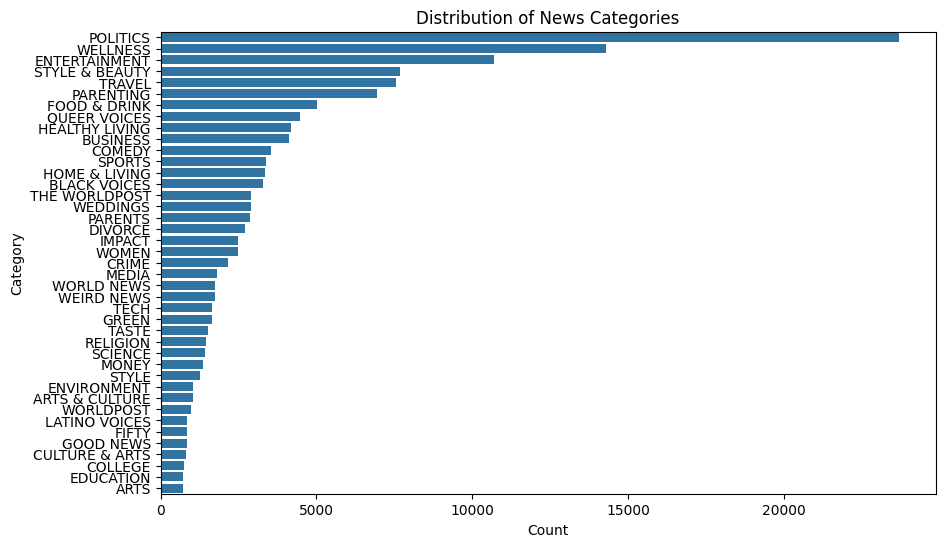

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of news categories
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df_train, order=df_train['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


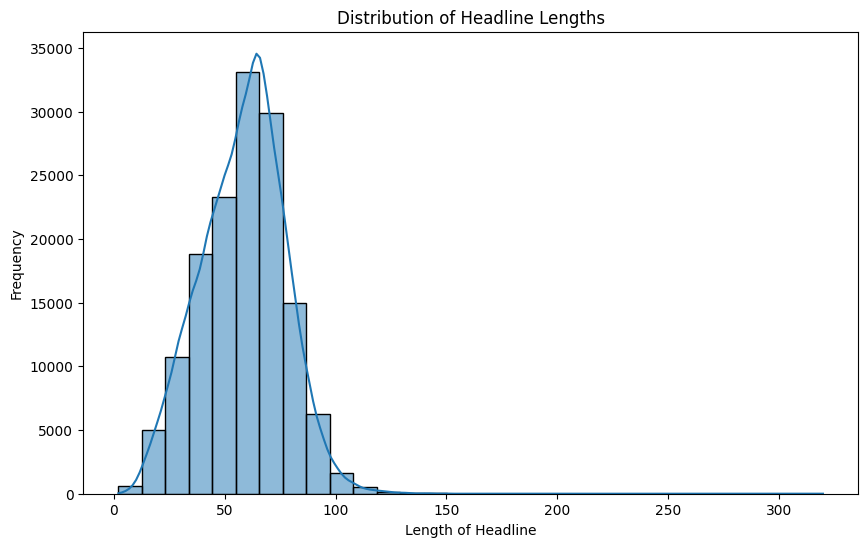

In [ ]:
# Analyze the length of headlines
df_train['headline_length'] = df_train['headline'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df_train['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()
